[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyCirclize/blob/main/docs/getting_started.ipynb)

In [1]:
# %pip install pycirclize

## 1. Circular Layout Design

pyCirclize uses a circular layout design with **Sectors** and **Tracks** inspired by [circlize](https://jokergoo.github.io/circlize_book/book/introduction.html#principle-of-design) (R package).
Different types of data can be assigned to each sector, and multiple tracks for data plotting can be freely placed within a sector.

### 1-1. Set Sectors

The size of each data is required to set the sectors in a circular layout, 
and the space size between sectors can also be set.  
For example, if the data size of each sector is `A=10, B=15, C=12, D=20, E=15` and 
the space between sectors is `5 degrees`, it can be set up with the following code.

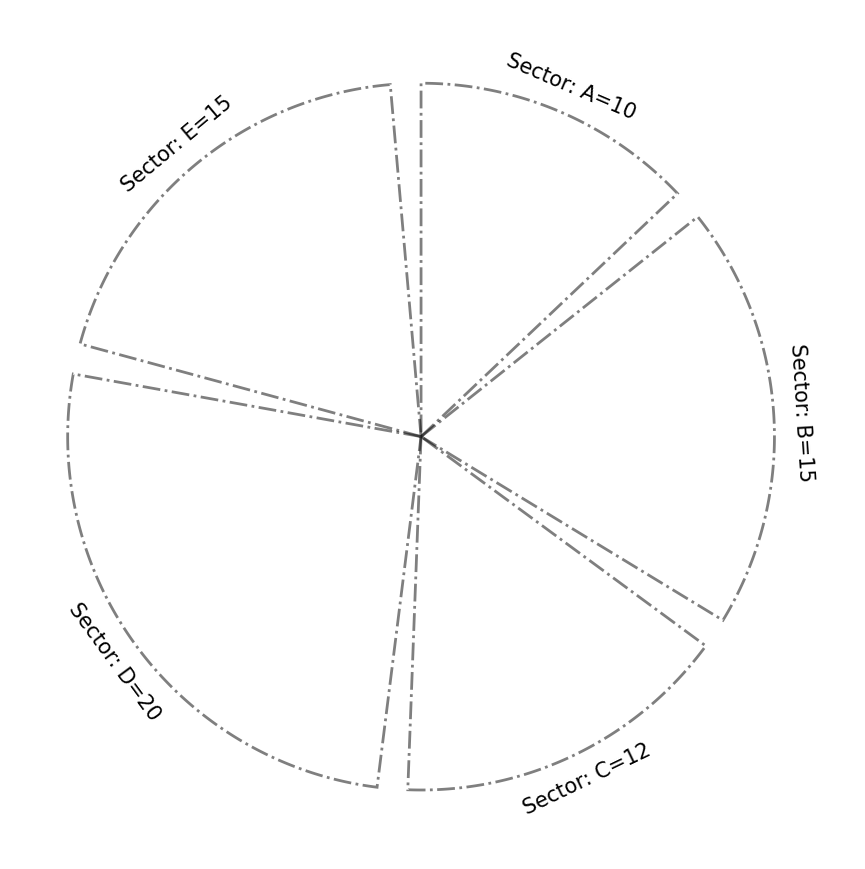

In [2]:
from pycirclize import Circos

# Initialize circos sectors
sectors = {"A": 10, "B": 15, "C": 12, "D": 20, "E": 15}
circos = Circos(sectors, space=5)

for sector in circos.sectors:
    # Plot sector axis & name text
    sector.axis(fc="none", ls="dashdot", lw=2, ec="black", alpha=0.5)
    sector.text(f"Sector: {sector.name}={sector.size}", size=15)

fig = circos.plotfig()

From the data size of each sector and the space size between sectors, 
the appropriate circular layout of the sectors is set as shown in the figure above.

In addition, user can freely set the start-end degrees of the circular layout 
in the range from -360 to 360. The following code is an example of setting `start=-270` and `end=30`.

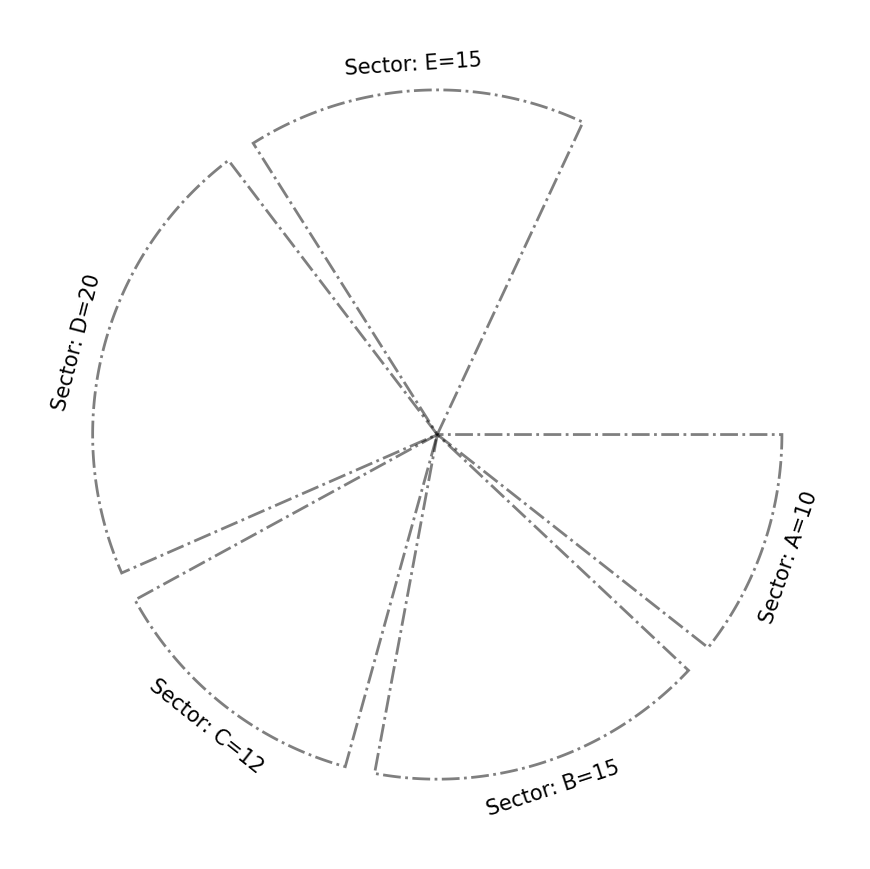

In [3]:
from pycirclize import Circos

# Initialize circos sectors
sectors = {"A": 10, "B": 15, "C": 12, "D": 20, "E": 15}
circos = Circos(sectors, space=5, start=-270, end=30) # Set start-end degree ranges

for sector in circos.sectors:
    # Plot sector axis & name text
    sector.axis(fc="none", ls="dashdot", lw=2, ec="black", alpha=0.5)
    sector.text(f"Sector: {sector.name}={sector.size}", size=15)

fig = circos.plotfig()

### 1-2. Set Tracks

User can freely place tracks within the sector radius range (0 - 100). 
The following code is an example of placing 3 tracks in each sector.

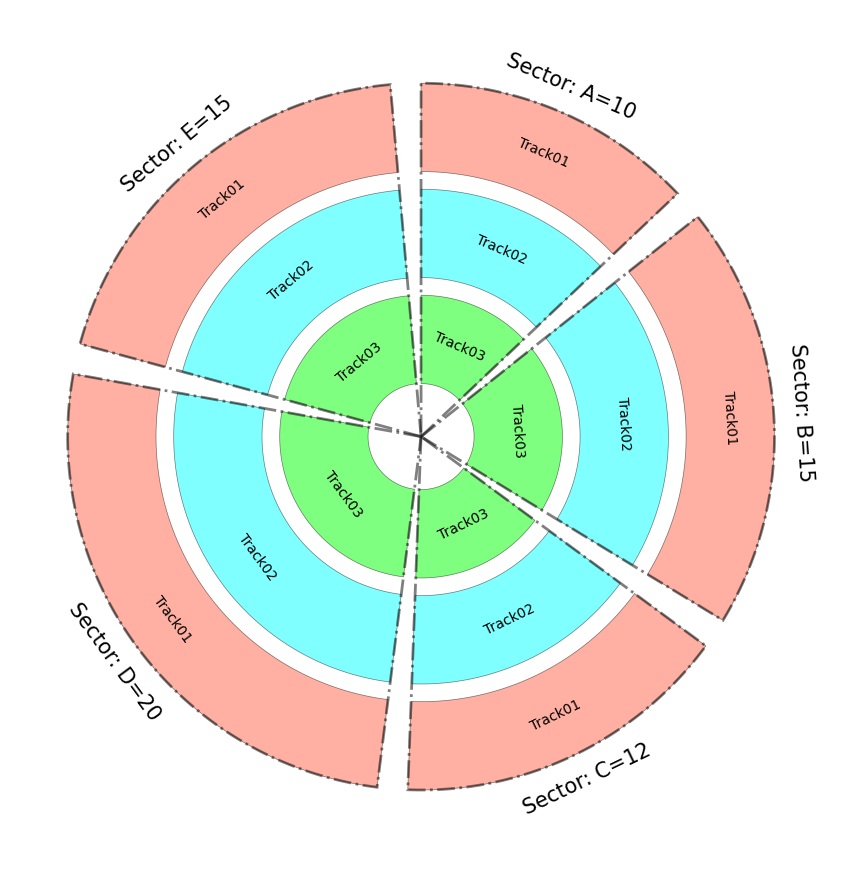

In [4]:
from pycirclize import Circos

# Initialize circos sectors
sectors = {"A": 10, "B": 15, "C": 12, "D": 20, "E": 15}
circos = Circos(sectors, space=5)

for sector in circos.sectors:
    # Plot sector axis & name text
    sector.axis(fc="none", ls="dashdot", lw=2, ec="black", alpha=0.5)
    sector.text(f"Sector: {sector.name}={sector.size}", size=15)
    # Set Track01 (Radius: 75 - 100)
    track1 = sector.add_track((75, 100))
    track1.axis(fc="tomato", alpha=0.5)
    track1.text(track1.name)
    # Set Track02 (Radius: 45 - 70)
    track2 = sector.add_track((45, 70))
    track2.axis(fc="cyan", alpha=0.5)
    track2.text(track2.name)
    # Set Track03 (Radius: 15 - 40)
    track3 = sector.add_track((15, 40))
    track3.axis(fc="lime", alpha=0.5)
    track3.text(track3.name)

fig = circos.plotfig()

In the above figure example, the tracks are just placed, but in reality, 
various numerical and statistical data are plotted to the tracks.
The next section explains how to plot within a track.

## 2. Plot Data on Track

Track has a variety of plotting functions. This section shows how to perform basic plotting on track.  

Lines, Points, and Bars can be plotted with the `track.line()`, `track.scatter()`, and `track.bar()` methods, respectively.
Also xticks can be plotted with the `track.xticks_by_interval()` method. Following is an example code.

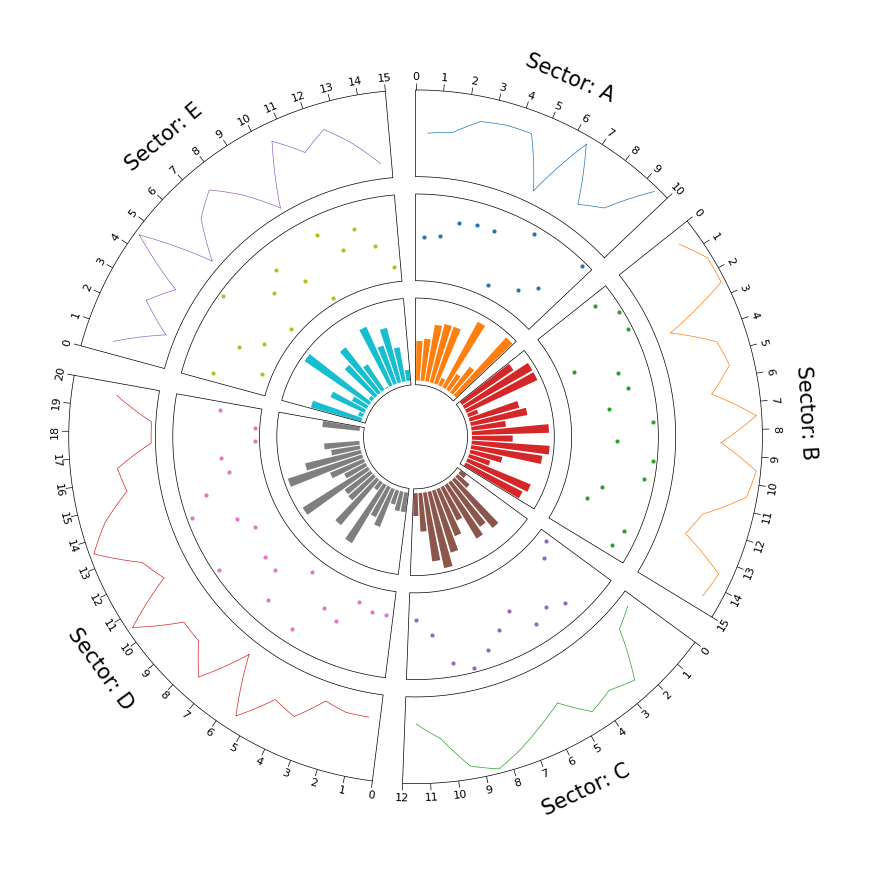

In [5]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

sectors = {"A": 10, "B": 15, "C": 12, "D": 20, "E": 15}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    # Plot sector name
    sector.text(f"Sector: {sector.name}", r=110, size=15)
    # Create x positions & randomized y values for data plotting
    x = np.arange(sector.start, sector.end) + 0.5
    y = np.random.randint(0, 100, len(x))
    # Plot line
    line_track = sector.add_track((75, 100), r_pad_ratio=0.1)
    line_track.axis()
    line_track.xticks_by_interval(1)
    line_track.line(x, y)
    # Plot points
    points_track = sector.add_track((45, 70), r_pad_ratio=0.1)
    points_track.axis()
    points_track.scatter(x, y)
    # Plot bar
    bar_track = sector.add_track((15, 40), r_pad_ratio=0.1)
    bar_track.axis()
    bar_track.bar(x, y)

fig = circos.plotfig()

User can also plot more data in a complex circular layout as follows.

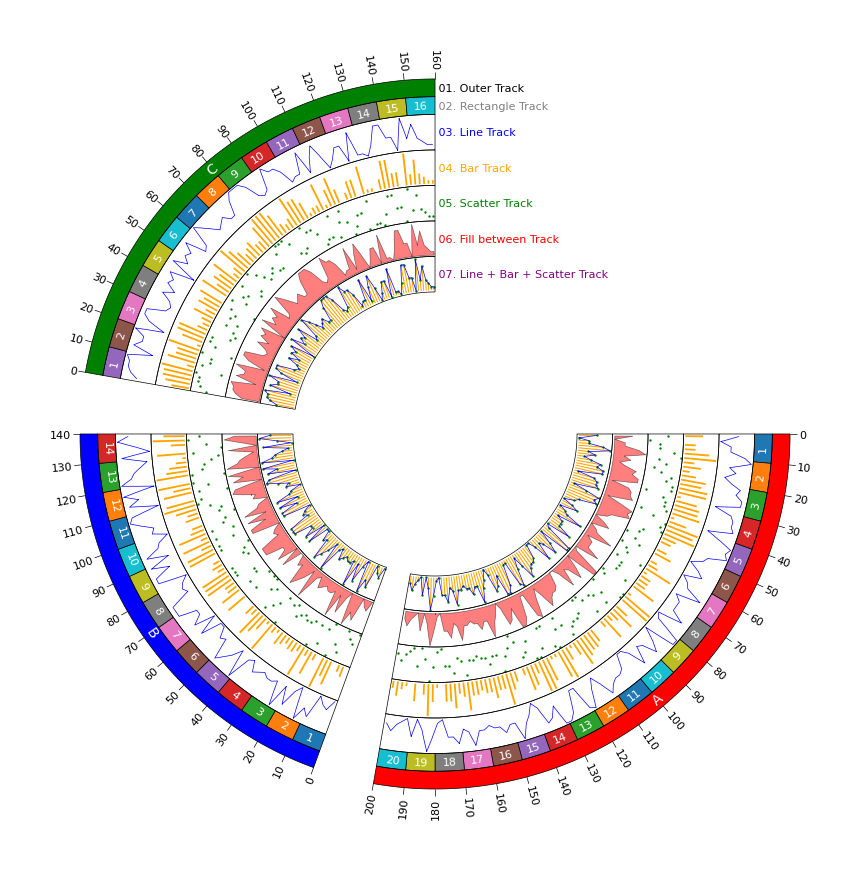

In [6]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler
import numpy as np

np.random.seed(0)
ColorCycler.set_cmap("tab10")

sectors = {"A": 200, "B": 140, "C": 160}
sector_colors = {"A": "red", "B": "blue", "C": "green"}
circos = Circos(sectors, space=10, start=90, end=360, endspace=False)

for sector in circos.sectors:
    # Outer Track
    outer_track = sector.add_track((95, 100))
    outer_track.text(sector.name, color="white")
    outer_track.axis(fc=sector_colors[sector.name])
    outer_track.xticks_by_interval(interval=10, label_orientation="vertical")
    # Rectangle Track
    rect_track = sector.add_track((90, 95))
    rect_size = 10
    for i in range(int(rect_track.size / rect_size)):
        x1, x2 = i * rect_size, i * rect_size + rect_size
        rect_track.rect(x1, x2, ec="black", lw=0.5, color=ColorCycler())
        rect_track.text(str(i + 1), (x1 + x2) / 2, size=8, color="white")
    # Generate random x, y plot data
    x = np.arange(1, int(sector.size), 2)
    y = np.random.randint(0, 10, len(x))
    # Line Track
    line_track = sector.add_track((80, 90), r_pad_ratio=0.1)
    line_track.axis()
    line_track.line(x, y, color="blue")
    # Scatter Track
    scatter_track = sector.add_track((70, 80), r_pad_ratio=0.1)
    scatter_track.axis()
    scatter_track.bar(x, y, width=0.8, color="orange")
    # Bar Track
    bar_track = sector.add_track((60, 70), r_pad_ratio=0.1)
    bar_track.axis()
    bar_track.scatter(x, y, color="green", s=3)
    # Fill Track
    fill_track = sector.add_track((50, 60), r_pad_ratio=0.1)
    fill_track.axis()
    fill_track.fill_between(x, y, y2=0, fc="red", ec="black", lw=0.5, alpha=0.5)
    # Line + Bar + Scatter Track
    line_bar_scatter_track = sector.add_track((40, 50), r_pad_ratio=0.1)
    line_bar_scatter_track.axis()
    line_bar_scatter_track.line(x, y, color="blue")
    line_bar_scatter_track.bar(x, y, width=0.8, color="orange")
    line_bar_scatter_track.scatter(x, y, color="green", s=3)

# Plot text description
text_common_kws = dict(ha="left", va="center", size=8)
circos.text(" 01. Outer Track", r=97.5, color="black", **text_common_kws)
circos.text(" 02. Rectangle Track", r=92.5, color="grey", **text_common_kws)
circos.text(" 03. Line Track", r=85, color="blue", **text_common_kws)
circos.text(" 04. Bar Track", r=75, color="orange", **text_common_kws)
circos.text(" 05. Scatter Track", r=65, color="green", **text_common_kws)
circos.text(" 06. Fill between Track", r=55, color="red", **text_common_kws)
circos.text(" 07. Line + Bar + Scatter Track", r=45, color="purple", **text_common_kws)

fig = circos.plotfig()

## 3. Plot Link

pyCirclize implements the function to plot links within or between data in a sector.
This function enables user to visualize interrelationships such as networks and flows between data.

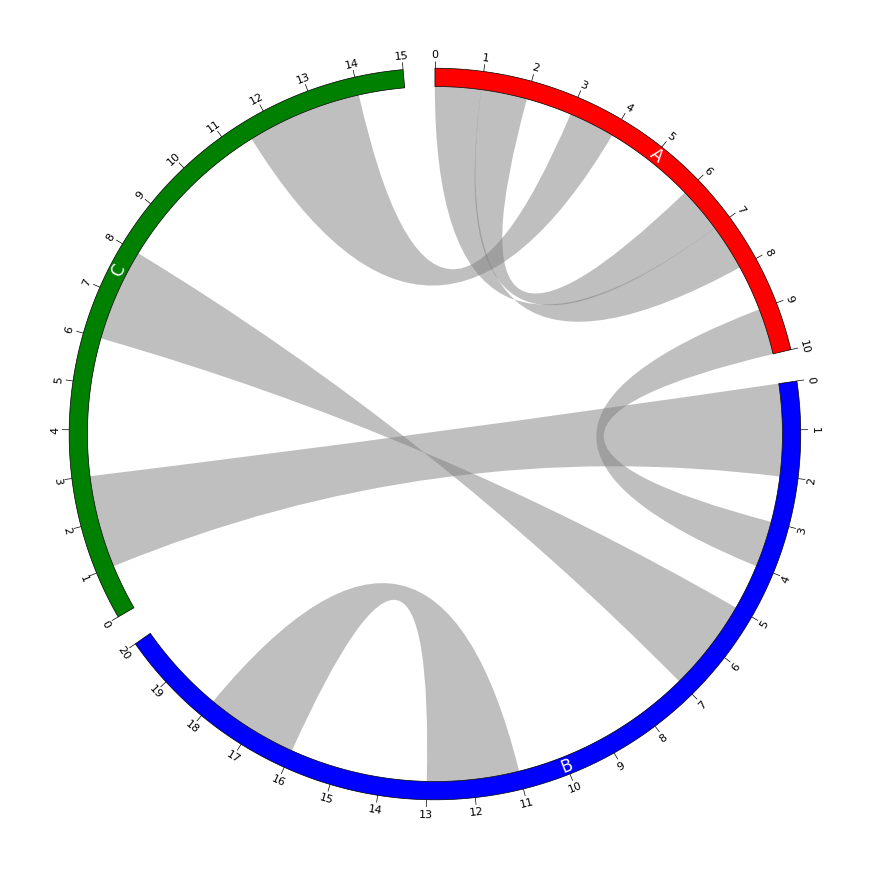

In [7]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
name2color = {"A": "red", "B": "blue", "C": "green"}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track = sector.add_track((95, 100))
    track.axis(fc=name2color[sector.name])
    track.text(sector.name, color="white", size=12)
    track.xticks_by_interval(1)

# Plot links
circos.link(("A", 0, 1), ("A", 7, 8))
circos.link(("A", 1, 2), ("A", 7, 6))
circos.link(("A", 9, 10), ("B", 4, 3))
circos.link(("B", 5, 7), ("C", 6, 8))
circos.link(("B", 18, 16), ("B", 11, 13))
circos.link(("C", 1, 3), ("B", 2, 0))
circos.link(("C", 11.5, 14), ("A", 4, 3))

fig = circos.plotfig()

User can freely set the plotting style of each link, such as color, texture, and direction.

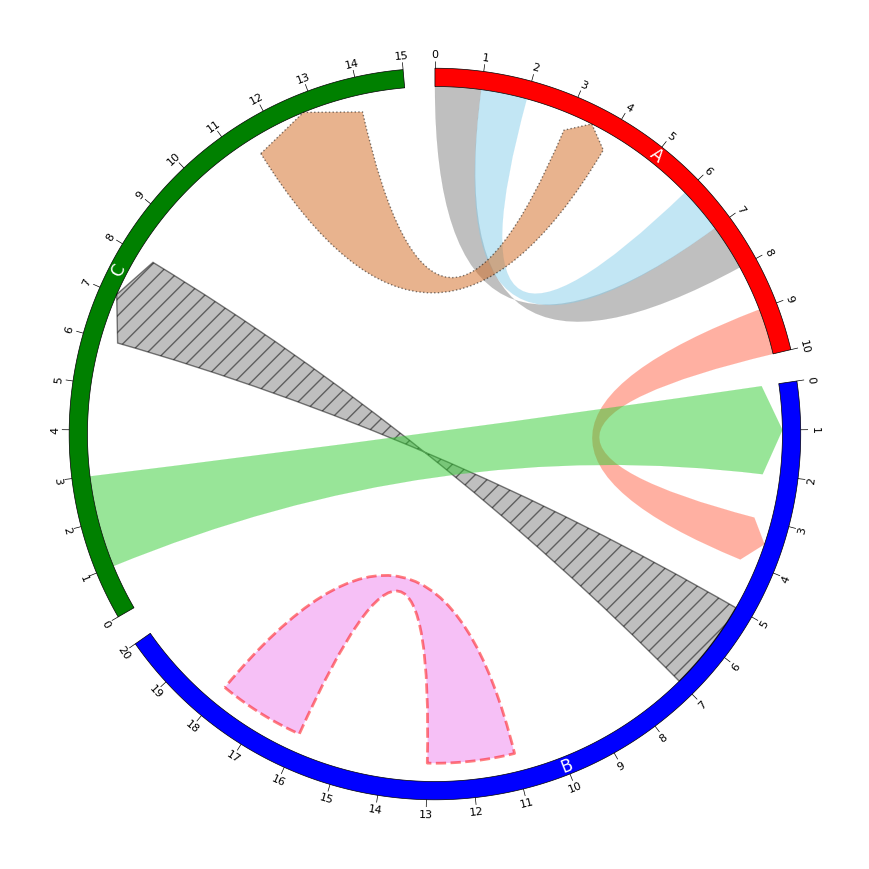

In [8]:
from pycirclize import Circos

sectors = {"A": 10, "B": 20, "C": 15}
name2color = {"A": "red", "B": "blue", "C": "green"}
circos = Circos(sectors, space=5)
for sector in circos.sectors:
    track = sector.add_track((95, 100))
    track.axis(fc=name2color[sector.name])
    track.text(sector.name, color="white", size=12)
    track.xticks_by_interval(1)

# Plot links with various styles
circos.link(("A", 0, 1), ("A", 7, 8))
circos.link(("A", 1, 2), ("A", 7, 6), color="skyblue")
circos.link(("A", 9, 10), ("B", 4, 3), direction=1, color="tomato")
circos.link(("B", 5, 7), ("C", 6, 8), direction=1, ec="black", lw=1, hatch="//")
circos.link(("B", 18, 16), ("B", 11, 13), r1=90, r2=90, color="violet", ec="red", lw=2, ls="dashed")
circos.link(("C", 1, 3), ("B", 2, 0), direction=1, color="limegreen")
circos.link(("C", 11.5, 14), ("A", 4, 3), direction=2, color="chocolate", ec="black", lw=1, ls="dotted")

fig = circos.plotfig()

Of course, it is also possible to combine data plots to track with link plots.

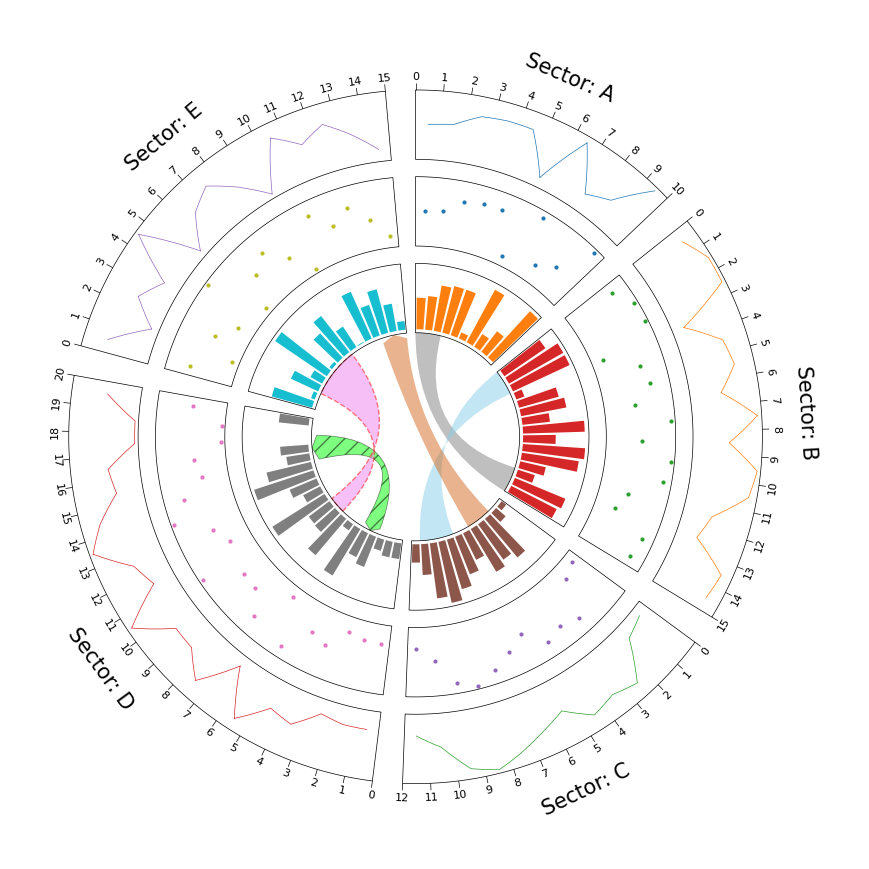

In [9]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

# Initialize Circos sectors
sectors = {"A": 10, "B": 15, "C": 12, "D": 20, "E": 15}
circos = Circos(sectors, space=5)

for sector in circos.sectors:
    # Plot sector name
    sector.text(f"Sector: {sector.name}", r=110, size=15)
    # Create x positions & randomized y values
    x = np.arange(sector.start, sector.end) + 0.5
    y = np.random.randint(0, 100, len(x))
    # Plot line track
    line_track = sector.add_track((80, 100), r_pad_ratio=0.1)
    line_track.xticks_by_interval(interval=1)
    line_track.axis()
    line_track.line(x, y)
    # Plot points track
    points_track = sector.add_track((55, 75), r_pad_ratio=0.1)
    points_track.axis()
    points_track.scatter(x, y)
    # Plot bar track
    bar_track = sector.add_track((30, 50), r_pad_ratio=0.1)
    bar_track.axis()
    bar_track.bar(x, y)

# Plot links
circos.link(("A", 0, 3), ("B", 15, 12))
circos.link(("B", 0, 3), ("C", 7, 11), color="skyblue")
circos.link(("C", 2, 5), ("E", 15, 12), color="chocolate", direction=1)
circos.link(("D", 3, 5), ("D", 18, 15), color="lime", ec="black", lw=0.5, hatch="//", direction=2)
circos.link(("D", 8, 10), ("E", 2, 8), color="violet", ec="red", lw=1.0, ls="dashed")

fig = circos.plotfig()

## 4. What's Next ?

pyCirclize implements a variety of plotting functions. 
Only a few of the plotting functions are introduced in this section.
If you want to know more about what kind of plotting function is available, 
I recommend you to look at the [Plot API Example](../plot_api_example/) next.

If you are interested in the contents of the following sections, you may want to look at them next.

- [Chord Diagram](../chord_diagram/)
- [Circos Plot (Genomics)](../circos_plot/)
- [Phylogenetic Tree](../phylogenetic_tree/)